In [173]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
import plotly.graph_objs as mplot3D
import plotly.express as px3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")
conjuntoDatos = pd.read_csv('./Mall_Customers.csv')
conjuntoDatos.head(10)

,Id_Clientes,Genero,Edad,Ingreso_anual,Puntaje_credito
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


2. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [174]:
conjuntoDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id_Clientes      200 non-null    int64 
 1   Genero           200 non-null    object
 2   Edad             200 non-null    int64 
 3   Ingreso_anual    200 non-null    int64 
 4   Puntaje_credito  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [175]:
conjuntoDatos.describe()

,Id_Clientes,Edad,Ingreso_anual,Puntaje_credito
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificacion de datos atipicos')

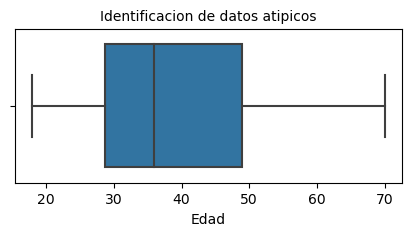

In [176]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Edad"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Text(0.5, 1.0, 'Identificacion de datos atipicos')

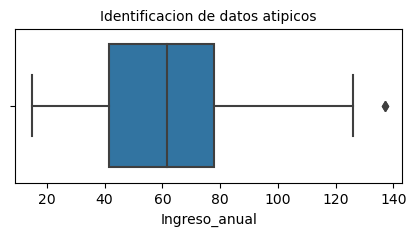

In [177]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Ingreso_anual"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Text(0.5, 1.0, 'Identificacion de datos atipicos')

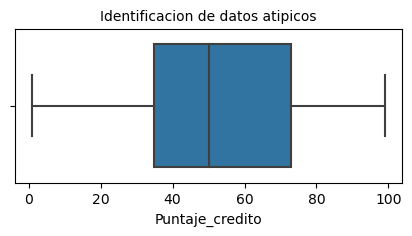

In [178]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Puntaje_credito"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)


3. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [179]:
conjuntoDatos.loc[conjuntoDatos['Genero'] == 'Male', 'Genero'] = 0
conjuntoDatos.loc[conjuntoDatos['Genero'] == 'Female', 'Genero'] = 1
#conjuntoDatos.loc[:,'Ingreso_anual'] *= 1000
conjuntoDatos

,Id_Clientes,Genero,Edad,Ingreso_anual,Puntaje_credito
0,1,0,19,15000,39
1,2,0,21,15000,81
2,3,1,20,16000,6
3,4,1,23,16000,77
4,5,1,31,17000,40
...,...,...,...,...,...
195,196,1,35,120000,79
196,197,1,45,126000,28
197,198,0,32,126000,74
198,199,0,32,137000,18


4. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
    
    variables objetivos del agrupamiento.

    * Salario_anual.
    * Puntaje_credito.
    * Edad.
    

In [180]:
subconjuntoDatos = conjuntoDatos[["Ingreso_anual", "Puntaje_credito", "Edad"]]
subconjuntoDatos.head(10)

,Ingreso_anual,Puntaje_credito,Edad
0,15000,39,19
1,15000,81,21
2,16000,6,20
3,16000,77,23
4,17000,40,31
5,17000,76,22
6,18000,6,35
7,18000,94,23
8,19000,3,64
9,19000,72,30


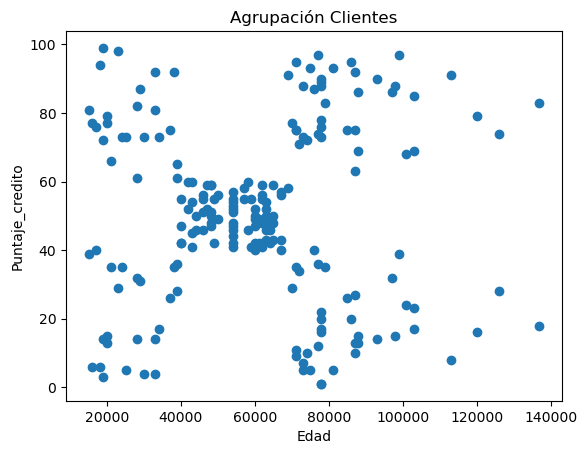

In [181]:
mplot.scatter(subconjuntoDatos['Ingreso_anual'], subconjuntoDatos['Puntaje_credito'])
mplot.xlabel('Edad')
mplot.ylabel('Puntaje_credito')
mplot.title('Agrupación Clientes')
mplot.show()

5. Entrenar el modelo configurando los diferentes hiperparámetros.

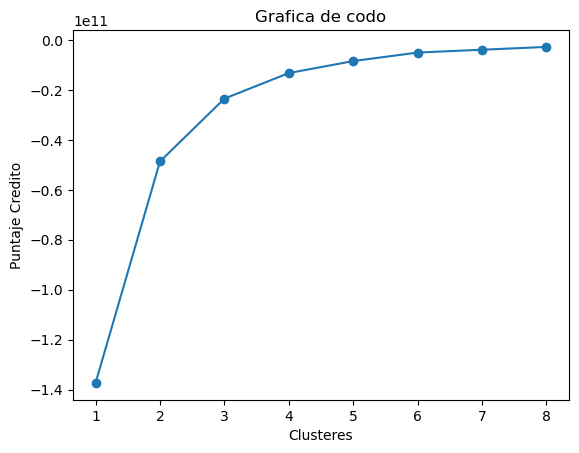

In [182]:
RangoGrafica = range(1,9)
kmeans = [KMeans(n_clusters = iterador) for iterador in RangoGrafica]
kmeans
score = [kmeans[iterador].fit(subconjuntoDatos).score(subconjuntoDatos) for iterador in range(len(kmeans))]
score
mplot.plot(RangoGrafica, score, marker = "o")
mplot.xlabel('Clusteres')
mplot.ylabel('Puntaje Credito')
mplot.title('Grafica de codo')
mplot.show()

In [201]:
ModeloKmeans = KMeans(n_clusters = 7, random_state = 0)
ModeloKmeans.fit(subconjuntoDatos)


KMeans(n_clusters=7, random_state=0)

In [202]:

ModeloKmeans.labels_
subconjuntoDatos['Clusteres'] = ModeloKmeans.labels_
print(subconjuntoDatos)


     Ingreso_anual  Puntaje_credito  Edad  Clusteres
0            15000               39    19          0
1            15000               81    21          0
2            16000                6    20          0
3            16000               77    23          0
4            17000               40    31          0
..             ...              ...   ...        ...
195         120000               79    35          4
196         126000               28    45          4
197         126000               74    32          4
198         137000               18    32          4
199         137000               83    30          4

[200 rows x 4 columns]


6. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [203]:
num_Observaciones = len(subconjuntoDatos)
X = subconjuntoDatos.drop('Clusteres', axis = 1)
clusters = subconjuntoDatos['Clusteres']


puntaje_Silueta = silhouette_score(X, clusters)
puntaje_Calinski = calinski_harabasz_score(X, clusters)
puntaje_Davies = davies_bouldin_score(X, clusters)


tabla_subConjunto = [['Numero observaciones', num_Observaciones],
                     ['Puntaje Silueta', puntaje_Silueta],
                     ['Indice Calinski-harabasz', puntaje_Calinski],
                     ['Indice Davies Boulin', puntaje_Davies]]

from tabulate import tabulate
print (tabulate(tabla_subConjunto, 
                headers = ['Metricas', 'valores'], 
                tablefmt = 'pretty'))
                     

+--------------------------+--------------------+
|         Metricas         |      valores       |
+--------------------------+--------------------+
|   Numero observaciones   |        200         |
|     Puntaje Silueta      | 0.6139869063764141 |
| Indice Calinski-harabasz | 1090.8194720731606 |
|   Indice Davies Boulin   | 0.4164486832350403 |
+--------------------------+--------------------+


7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo


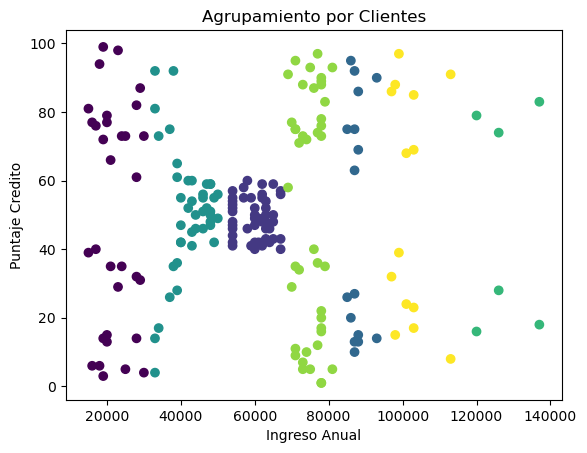

In [204]:
mplot.scatter(subconjuntoDatos['Ingreso_anual'], subconjuntoDatos['Puntaje_credito'], 
                                c = subconjuntoDatos['Clusteres'], cmap = 'viridis')
mplot.xlabel('Ingreso Anual')
mplot.ylabel('Puntaje Credito')
mplot.title('Agrupamiento por Clientes')
mplot.show()

In [205]:
grafica3D = px3D.scatter_3d(subconjuntoDatos, x = 'Ingreso_anual', y = 'Puntaje_credito', 
                                              z = 'Edad', color = 'Clusteres', symbol = 'Clusteres',
                                              symbol_map = {0: 'circle', 1: 'circle', 
                                                          2: 'circle', 3: 'circle', 4:'circle'})
grafica3D.update_layout(showlegend = False)

8. Interpretar, analizar y documentar los resultados obtenidos.